In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [20]:
unitTime_in_Myrs = 0.5048 # Myrs
UnitDensity_in_cgs = 5.9e-20

In [121]:
jj = 17
#file = h5py.File('snap_' + str(jj).zfill(3) +'.hdf5', 'r')
file = h5py.File('./100k_Gadget/snap_' + str(jj).zfill(3) +'.hdf5', 'r')

In [122]:
tStep = 0.01 # From Gadget parameter file.
currentTime = jj * tStep * unitTime_in_Myrs
print(f'currentTime = {round(currentTime, 3)} Myrs.')

currentTime = 0.086 Myrs.


In [123]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [124]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [125]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [126]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (200000, 3), type "<f4">

In [127]:
vel = file['PartType0']['Velocities']
np.sort((vel[:, 0]))

array([-9.859994, -9.725971, -9.531908, ...,  9.342999,  9.488809,
        9.802285], dtype=float32)

In [128]:
np.sort((vel[:, 0])).shape

(200000,)

(-1.5, 1.5)

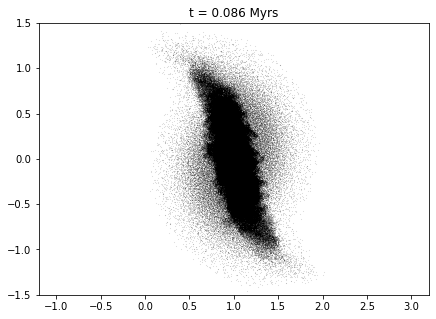

In [129]:
#with open('../Testing_Auto_timestep/Outputs_0.5_m_8k_my_code/00400.pkl', 'rb') as f:
#    data = pickle.load(f)
#    r = data['pos']

#j = 320
    
#print(r.shape)
plt.figure(figsize = (7, 5))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.002, color = 'black')


plt.title(f't = {round(currentTime, 3)} Myrs')

plt.xlim(-1.2, 3.2)
plt.ylim(-1.5, 1.5)

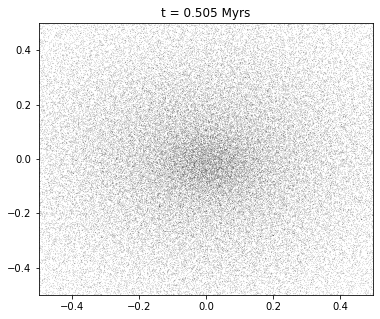

In [99]:
plt.figure(figsize = (6, 5))
plt.scatter(coord[:, 1], coord[:, 2], s = 0.001, color = 'black')

xyrange = 0.5
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange)
plt.title(f't = {round(currentTime, 3)} Myrs');


In [100]:
h = np.array(file['PartType0']['SmoothingLength'])

np.min(h), np.max(h), np.median(h)

(0.05143423, 3.8708832, 0.17312458)

In [101]:
rho = np.array(list(file['PartType0']['Density']))
np.sort(rho) * UnitDensity_in_cgs

array([1.6168872e-25, 1.6640396e-25, 1.7744001e-25, ..., 6.3926986e-20,
       6.3957812e-20, 6.4127513e-20], dtype=float32)

In [102]:
np.sort(rho)

array([2.7404867e-06, 2.8204061e-06, 3.0074577e-06, ..., 1.0835083e+00,
       1.0840306e+00, 1.0869070e+00], dtype=float32)

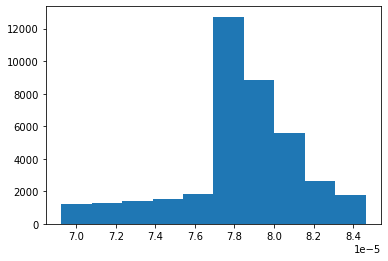

In [247]:
plt.hist(rho * (h/2.)**3);

In [200]:
u = file['PartType0']['InternalEnergy']
min(u), max(u), np.median(u)

(0.644602, 0.644602, 0.644602)

In [246]:
m = np.array(file['PartType0']['Masses'])
np.sort(m)

array([5.1565e-05, 5.1565e-05, 5.1565e-05, ..., 5.1565e-05, 5.1565e-05,
       5.1565e-05], dtype=float32)

In [29]:
v = file['PartType0']['Velocities']
v

<HDF5 dataset "Velocities": shape (32768, 3), type "<f4">

In [ ]:
ids = file['PartType0']['ParticleIDs']
ids

In [ ]:
len(np.unique(list(ids)))